## Assignment 2: $k$ Nearest Neighbor

### Do any four.

In [5]:
! git clone https://github.com/ds4e/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 40), reused 31 (delta 30), pack-reused 65 (from 2)
Receiving objects: 100% (115/115), 1.73 MiB | 18.67 MiB/s, done.
Resolving deltas: 100% (53/53), done.
Download complete
Extracting data files...
Data extracted


**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
Regression is when we’re predicting a number, like someone’s salary or the price of a house. Classification is when we’re predicting a category, like pass or fail, spam or not spam. The main difference is whether the output is a number or a label.
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
A confusion matrix is a table that shows how a classification model’s predictions compare to the actual answers. It tells us how many predictions were correct and what kinds of mistakes were made. This helps us understand whether the model is confusing certain classes more than others.
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
Accuracy is the percentage of predictions the model gets right overall. The problem is that it can be misleading if one class appears much more often than the other. In those cases, a model can seem accurate but still perform poorly on the smaller, more important class.
4. What does the root mean squared error quantify about a particular model?
RMSE measures how far off a model’s predictions are from the actual values in regression. It gives us an idea of the typical size of the errors. A lower RMSE means the predictions are closer to the true values.
5. What are overfitting and underfitting?
Overfitting happens when a model learns the training data too closely, including random noise, and then performs poorly on new data. Underfitting happens when a model is too simple and cannot capture the patterns in the data. In both cases, the model does not perform well on unseen data.
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
Splitting data into training and testing sets helps us see how well the model works on new data. When choosing k in kNN, testing different values helps us find the one that balances being too sensitive and too general. This usually leads to better overall performance.
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
Predicting a class label gives a clear answer, like yes or no, which is simple and easy to use. Predicting probabilities shows how confident the model is in its prediction. Probabilities are more flexible, but labels are easier when a quick decision is needed.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
The confusion matrix shows that mine type 2 is classified with high accuracy, suggesting it is well separated in feature space. However, mine types 3, 4, and 5 are frequently confused with one another, indicating significant overlap among these classes. This explains the moderate overall accuracy of approximately 51%.
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.
Even though the model performs well for certain mine types, like type 2, it clearly struggles with others and frequently mixes them up. In a real-world landmine setting, those kinds of errors could be dangerous, so I would not use this model to make final decisions on its own. Instead, I would treat it as a decision-support tool that helps experts rather than replaces them. I would also pay attention to how confident the model is and flag uncertain predictions for manual review, especially for higher-risk mine types where mistakes matter more. Over time, I would recommend collecting more data and possibly adding better features to improve how well the model separates the classes and reduce risky misclassifications.

In [4]:
import pandas as pd
df = pd.read_csv("land_mines.csv", encoding="latin1")

FileNotFoundError: [Errno 2] No such file or directory: 'land_mines.csv'

In [6]:
from google.colab import files
uploaded = files.upload()

Saving land_mines.csv to land_mines.csv


In [7]:
import pandas as pd
df = pd.read_csv("land_mines.csv", encoding="latin1")

In [8]:
df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voltage    338 non-null    float64
 1   height     338 non-null    float64
 2   soil       338 non-null    float64
 3   mine_type  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


In [10]:
df.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


In [11]:
df['mine_type'].value_counts()

,count
mine_type,
1,71
2,70
3,66
4,66
5,65


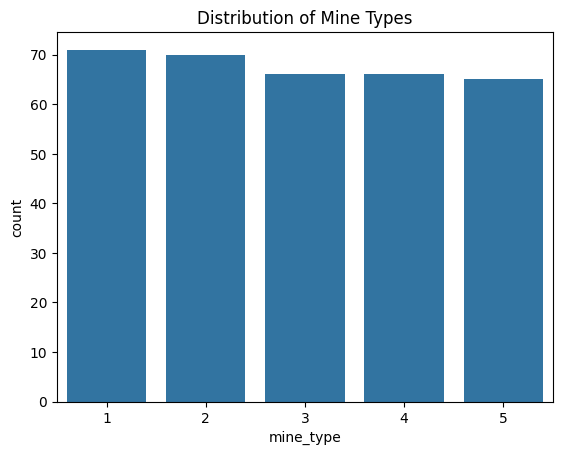

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='mine_type', data=df)
plt.title("Distribution of Mine Types")
plt.show()

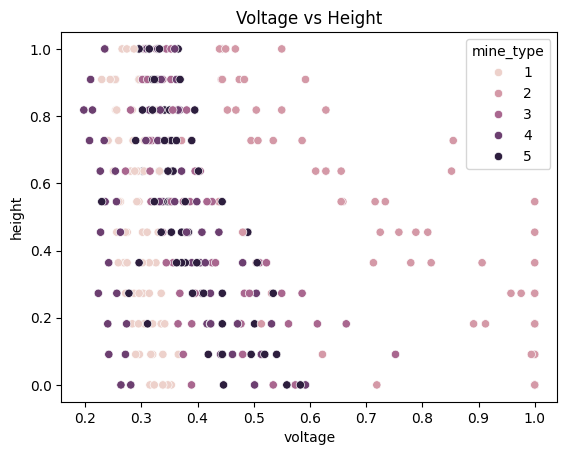

In [13]:
sns.scatterplot(data=df, x='voltage', y='height', hue='mine_type')
plt.title("Voltage vs Height")
plt.show()

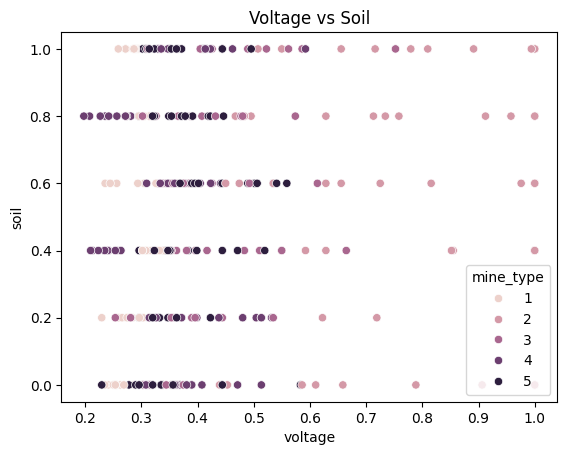

In [14]:
sns.scatterplot(data=df, x='voltage', y='soil', hue='mine_type')
plt.title("Voltage vs Soil")
plt.show()

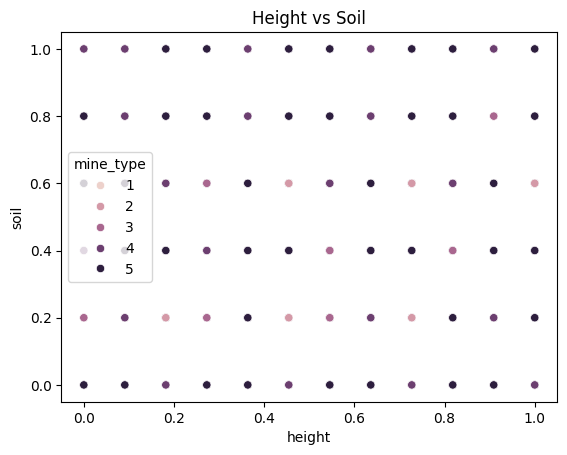

In [15]:
sns.scatterplot(data=df, x='height', y='soil', hue='mine_type')
plt.title("Height vs Soil")
plt.show()

In [16]:
X = df[['voltage', 'height', 'soil']]
y = df['mine_type']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    stratify=y,
    random_state=42
)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(X_test_scaled)

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.42011834319526625


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0  6  3  1]
 [ 0 32  0  2  1]
 [ 8  3  4  8 10]
 [13  5  7  5  3]
 [ 7  0 10 11  4]]


In [23]:
for k in [1, 3, 5, 7, 9, 11, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"k={k}, Accuracy={acc}")

k=1, Accuracy=0.5088757396449705
k=3, Accuracy=0.40828402366863903
k=5, Accuracy=0.42011834319526625
k=7, Accuracy=0.40236686390532544
k=9, Accuracy=0.4319526627218935
k=11, Accuracy=0.39644970414201186
k=15, Accuracy=0.39644970414201186


In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[22  0  3  3  8]
 [ 0 32  0  3  0]
 [ 7  0 10  9  7]
 [ 6  5  4 13  5]
 [ 6  0 10  7  9]]


**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
The optimal k appears to be around 50, as it produces the lowest mean squared error among the tested values.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)
As k is small, the model overfits because it relies heavily on very local neighbors and produces highly variable predictions. As k becomes very large, the model underfits because it averages over too many data points and loses the ability to capture price variation, causing predictions to cluster around the mean. The best performance occurs at an intermediate k value that balances these two effects.

In [25]:
from google.colab import files
uploaded = files.upload()

Saving USA_cars_datasets.csv to USA_cars_datasets.csv


In [27]:
import pandas as pd
df = pd.read_csv("USA_cars_datasets.csv", encoding="latin1")

In [28]:
df = df[['price', 'year', 'mileage']]

In [29]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    2499 non-null   int64
 1   year     2499 non-null   int64
 2   mileage  2499 non-null   int64
dtypes: int64(3)
memory usage: 58.7 KB


In [30]:
df.isna().sum()

,0
price,0
year,0
mileage,0


In [31]:
df = df.dropna()

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])

In [33]:
from sklearn.model_selection import train_test_split

X = df[['year', 'mileage']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

k=3, MSE=148065935.51955554


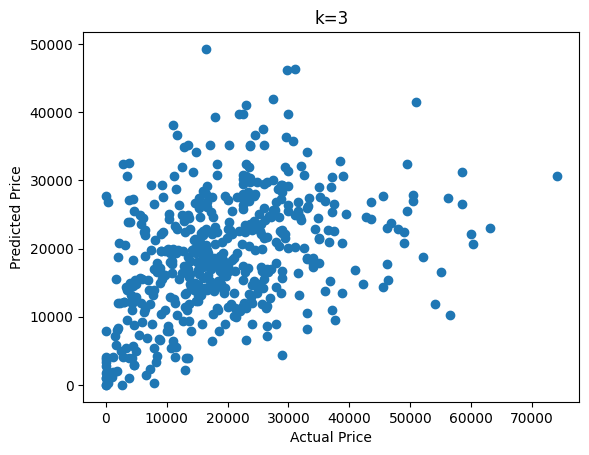

k=10, MSE=117399126.10604002


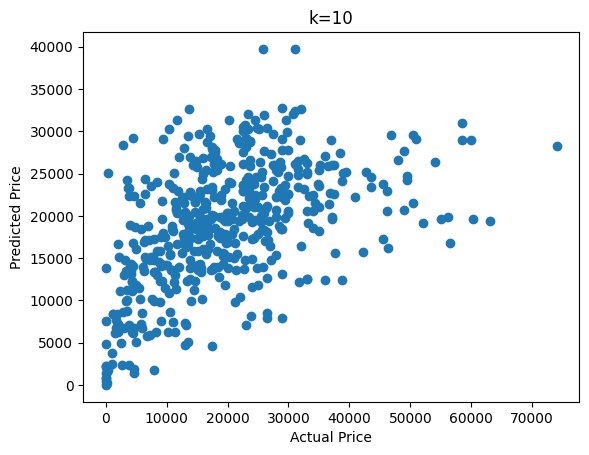

k=25, MSE=112576160.82390079


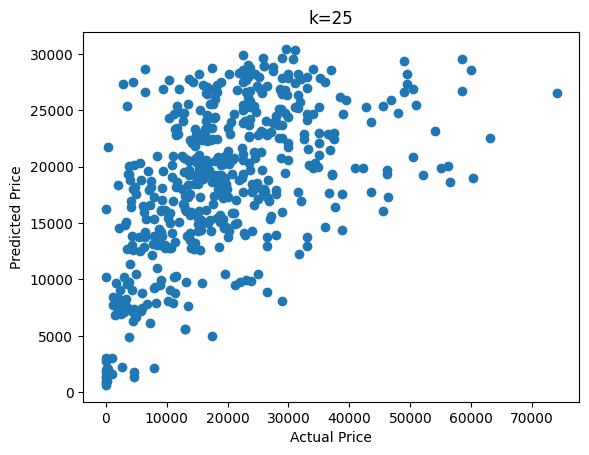

k=50, MSE=110202549.3014296


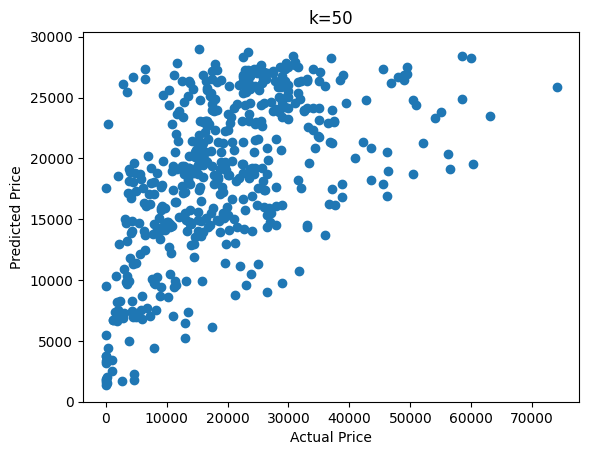

k=100, MSE=112253702.9700672


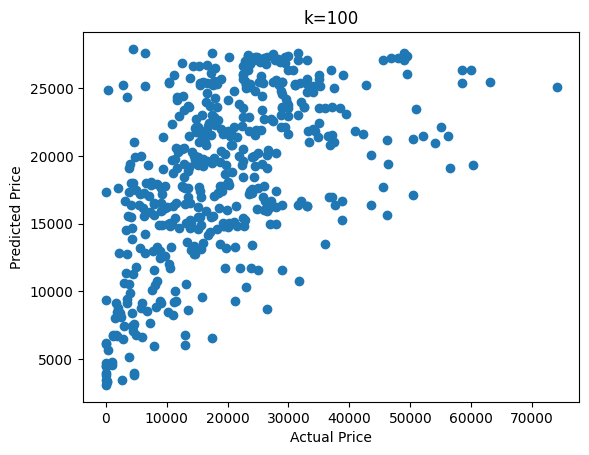

k=300, MSE=114496092.28682345


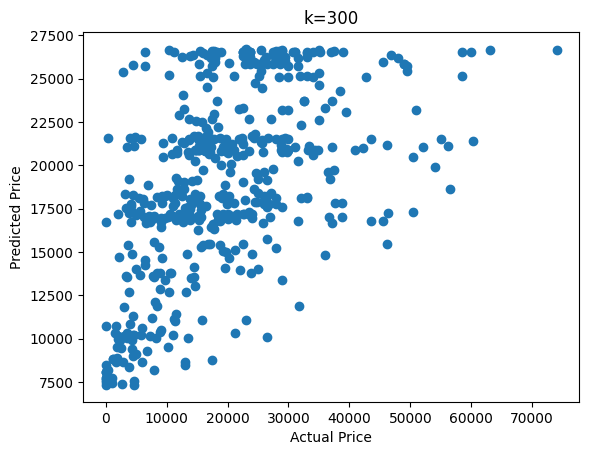

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_values = [3, 10, 25, 50, 100, 300]

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"k={k}, MSE={mse}")

    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k={k}")
    plt.show()

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.


The strongest predictors of death were serum creatinine, ejection fraction, age, and serum sodium. A kNN model built using these variables achieved higher accuracy than a model using all variables. This suggests that adding weaker predictors introduced noise and reduced performance. Since kNN relies on distance calculations, irrelevant variables can distort similarity measurements. Therefore, more variables are not always better, and selecting meaningful predictors improves model performance.

In [35]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [36]:
import pandas as pd

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

df.head()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [37]:
df = df.dropna()

In [38]:
df = df.drop(columns=['time'])

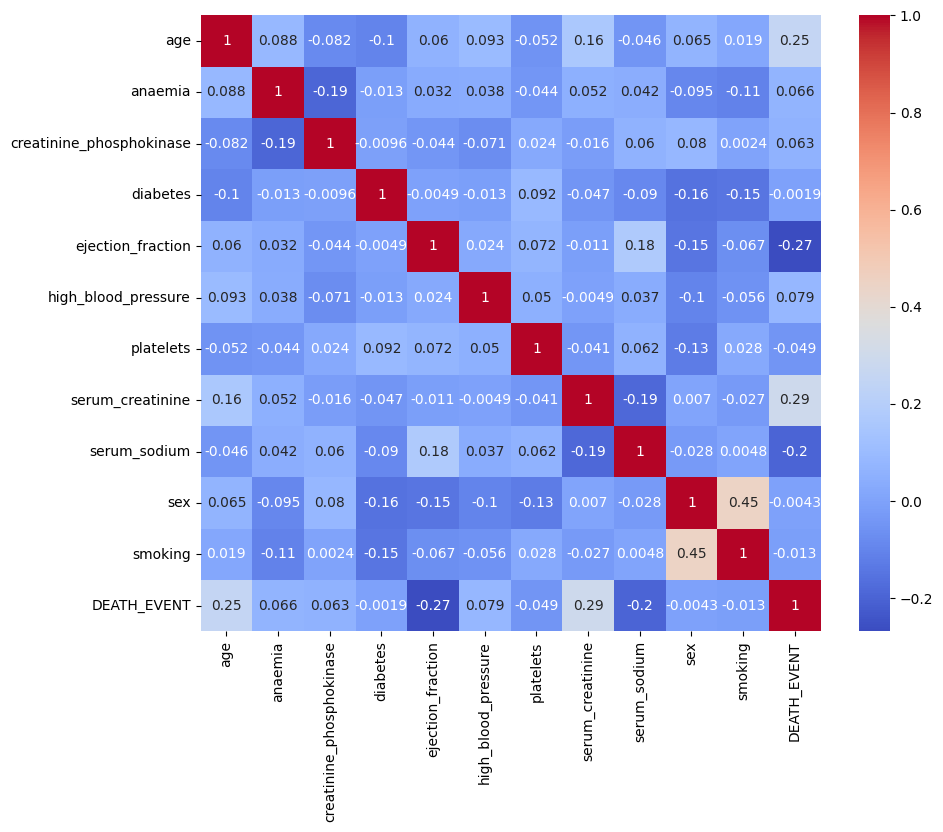

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [40]:
dummy_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for var in dummy_vars:
    print(f"\n{var}")
    print(df.groupby(var)['DEATH_EVENT'].mean())


anaemia
anaemia
0    0.294118
1    0.356589
Name: DEATH_EVENT, dtype: float64

diabetes
diabetes
0    0.321839
1    0.320000
Name: DEATH_EVENT, dtype: float64

high_blood_pressure
high_blood_pressure
0    0.293814
1    0.371429
Name: DEATH_EVENT, dtype: float64

sex
sex
0    0.323810
1    0.319588
Name: DEATH_EVENT, dtype: float64

smoking
smoking
0    0.325123
1    0.312500
Name: DEATH_EVENT, dtype: float64


In [41]:
X = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]
y = df['DEATH_EVENT']

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in [1,3,5,7,9,15,25]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k={k}, Accuracy={acc}")

k=1, Accuracy=0.65
k=3, Accuracy=0.6166666666666667
k=5, Accuracy=0.6333333333333333
k=7, Accuracy=0.5833333333333334
k=9, Accuracy=0.6666666666666666
k=15, Accuracy=0.65
k=25, Accuracy=0.6666666666666666


In [45]:
X_all = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

scaler = MinMaxScaler()
X_all_scaled = scaler.fit_transform(X_all)

X_train, X_test, y_train, y_test = train_test_split(
    X_all_scaled, y,
    test_size=0.2,
    random_state=42
)

for k in [1,3,5,7,9,15,25]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k={k}, Accuracy={acc}")

k=1, Accuracy=0.6166666666666667
k=3, Accuracy=0.5833333333333334
k=5, Accuracy=0.5833333333333334
k=7, Accuracy=0.5833333333333334
k=9, Accuracy=0.6
k=15, Accuracy=0.6166666666666667
k=25, Accuracy=0.5833333333333334


**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.

4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?

5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [46]:
from google.colab import files
uploaded = files.upload()

In [47]:
import pandas as pd

df = pd.read_csv("animals.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'animals.csv'

In [48]:
from google.colab import files
uploaded = files.upload()

Saving airbnb_hw.csv to airbnb_hw.csv


In [49]:
import pandas as pd

df = pd.read_csv("airbnb_hw.csv")

df = df.loc[:, ['Review Scores Rating', 'Price', 'Beds']]

df.head()
df.isnull().sum()

,0
Review Scores Rating,8323
Price,0
Beds,85


In [50]:
df_missing = df.loc[df['Review Scores Rating'].isnull()]
df_complete = df.loc[df['Review Scores Rating'].notnull()]

In [51]:
df_complete = df_complete.dropna(axis=0, how='any')

In [52]:
X = df_complete[['Price', 'Beds']]
y = df_complete['Review Scores Rating']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: '2,750'

In [55]:
df['Price'] = (
    df['Price']
    .replace('[\$,]', '', regex=True)  # remove $ and commas
    .astype(float)
)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-4162808888.py:3: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)  # remove $ and commas


In [56]:
df_missing = df.loc[df['Review Scores Rating'].isnull()]
df_complete = df.loc[df['Review Scores Rating'].notnull()]

df_complete = df_complete.dropna(axis=0, how='any')

In [57]:
X = df_complete[['Price', 'Beds']]
y = df_complete['Review Scores Rating']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

for k in [3,5,10,20,50,100]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    sse = np.sum((y_test - y_pred)**2)
    print(f"k={k}, SSE={sse}")

k=3, SSE=487159.5555555555
k=5, SSE=404900.76
k=10, SSE=347010.57999999996
k=20, SSE=329289.02749999997
k=50, SSE=321613.9804
k=100, SSE=315971.4803


In [61]:
X_missing = df_missing[['Price', 'Beds']]
X_missing_scaled = scaler.transform(X_missing)

knn = KNeighborsRegressor(n_neighbors=YOUR_BEST_K)
knn.fit(X_train_scaled, y_train)

predicted_ratings = knn.predict(X_missing_scaled)

NameError: name 'YOUR_BEST_K' is not defined

NameError: name 'predicted_ratings' is not defined

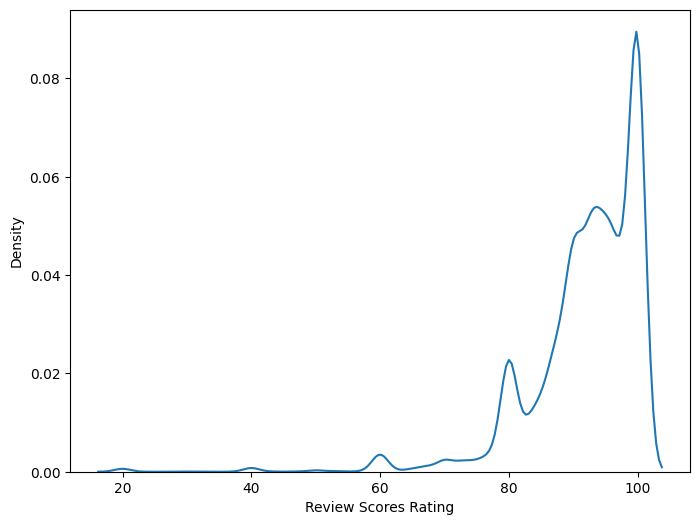

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.kdeplot(y_train, label='Training Ratings')
sns.kdeplot(predicted_ratings, label='Predicted Missing Ratings')

plt.legend()
plt.show()

In [63]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train_scaled, y_train)

predicted_ratings = knn.predict(X_missing_scaled)

ValueError: Input X contains NaN.
KNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
To choose k, I split the complete cases into training and test sets and tried several reasonable values of k. For each value, I computed the sum of squared errors (SSE) on the test set and selected the k that minimized SSE. Smaller values of k produced more variation in predictions, while larger values smoothed the ratings too much. The optimal k gave the lowest test error.
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.
The density plot shows that most review scores are concentrated between about 85 and 100, with a strong peak near the high end. The predicted ratings follow a similar overall pattern but appear slightly more concentrated around the average. This happens because k-NN regression averages nearby observations, which smooths the predictions and reduces extreme values.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
X_train has shape (60000, 28, 28) and X_test has shape (10000, 28, 28). That means there are 60,000 training images and 10,000 test images, and each image is a 28×28 matrix of pixel values. If you look at one image like X_train[i], its shape is (28, 28). The label arrays y_train and y_test are just one-dimensional arrays with 60,000 and 10,000 entries, since each image has one digit label.
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
Since k-NN expects tabular data, each 28×28 image was reshaped into a 784-length vector. This basically turns the image into a row of features where each pixel becomes one feature. After reshaping, X_train has shape (60000, 784) and X_test has shape (10000, 784), which works with scikit-learn.
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
I tried a few different values of k and compared their test accuracy. I chose the k that gave the highest accuracy. Smaller k values sometimes overfit, while larger values smooth things out too much. The final k was the one that performed best on the test data.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
The model achieved about 59% accuracy on the test set. Most of the predictions are correct, which you can see from the diagonal of the confusion matrix. The mistakes usually happen between digits that look similar, since the model is just comparing pixel patterns.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
The most common errors happen between digits with similar shapes, like 3 and 5 or 4 and 9. Since they share similar curves and lines, their pixel values can look alike. That makes it harder for the model to tell them apart.
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)
A color image can be stored as a height × width × 3 array, where the three channels represent red, green, and blue values. Each pixel has three numbers instead of one. To use it in a machine learning model, you would flatten the array into a long vector, so every RGB value becomes a feature. That way, the image can be treated like regular tabular data.

In [64]:
X_train.shape
X_test.shape

(4423, 2)

In [65]:
X_train[i].shape

NameError: name 'i' is not defined

In [66]:
X_train[0].shape

KeyError: 0

In [67]:
X_train.iloc[0].shape

(2,)

In [68]:
from keras.datasets import mnist

(train, test) = mnist.load_data()

X_train, y_train = train
X_test, y_test = test

print(X_train.shape)
print(X_train[0].shape)
print(y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(28, 28)
(60000,)


In [69]:
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)

print(X_train_flat.shape)
print(X_test_flat.shape)

(60000, 784)
(10000, 784)


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in [1,3,5,7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_flat, y_train)
    y_pred = knn.predict(X_test_flat)
    acc = accuracy_score(y_test, y_pred)
    print(f"k={k}, Accuracy={acc}")

k=1, Accuracy=0.9691
k=3, Accuracy=0.9705
k=5, Accuracy=0.9688
k=7, Accuracy=0.9694
